In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\andri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [27]:
df =pd.read_csv('sentimentdataset.csv')
df.Text = df.Text.astype(str)

In [28]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

In [29]:
def preprocess_text(text):

    tokens = word_tokenize(text.lower())

    translator = str.maketrans('', '', string.punctuation)
    text.translate(translator)

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)
    return processed_text
df['Clean_Text'] = df['Text'].apply(preprocess_text)

In [30]:
df1 = df.copy()

In [31]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                           Clean_Text  Vader_Score Sentiment
0       enjoying beautiful day park !       0.8221  positive
1          traffic terrible morning .      -0.4767  negative
2        finished amazing workout ! 💪       0.6239  positive
3  excited upcoming weekend getaway !       0.4003  positive
4  trying new recipe dinner tonight .       0.0000   neutral


In [32]:
df2 = df1.copy()

In [33]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=103)

In [34]:
print("Data testing = ",X_test.shape[0],",", y_test.shape[0])
print("Data training = ",X_train.shape[0],",", y_train.shape[0])
print(df.shape)

Data testing =  220 , 220
Data training =  512 , 512
(732, 10)


In [35]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Metode PassiveAggressiveClassifier

In [69]:
pac_classifier = PassiveAggressiveClassifier(C = 1, max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [70]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.8954545454545455
Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.60      0.58        15
     neutral       0.98      0.92      0.95       133
    positive       0.84      0.92      0.87        72

    accuracy                           0.90       220
   macro avg       0.79      0.81      0.80       220
weighted avg       0.90      0.90      0.90       220



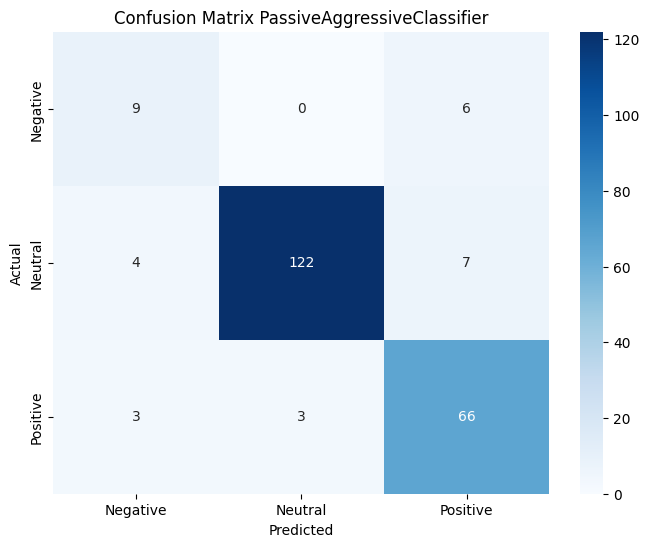

In [38]:
y_pred = pac_classifier.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PassiveAggressiveClassifier')
plt.show()

Metode LogisticRegression

In [39]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

c:\Users\andri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [40]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.8636363636363636
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        15
     neutral       1.00      0.89      0.94       133
    positive       0.71      1.00      0.83        72

    accuracy                           0.86       220
   macro avg       0.57      0.63      0.59       220
weighted avg       0.84      0.86      0.84       220



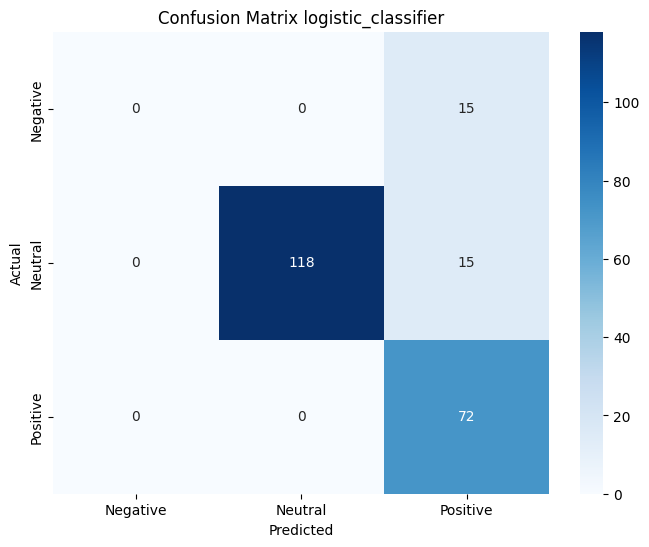

In [41]:
y_pred = logistic_classifier.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix logistic_classifier')
plt.show()

Metode RandomForestClassifier

In [42]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [43]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.8681818181818182
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.07      0.12        15
     neutral       0.99      0.89      0.94       133
    positive       0.72      0.99      0.83        72

    accuracy                           0.87       220
   macro avg       0.90      0.65      0.63       220
weighted avg       0.90      0.87      0.85       220



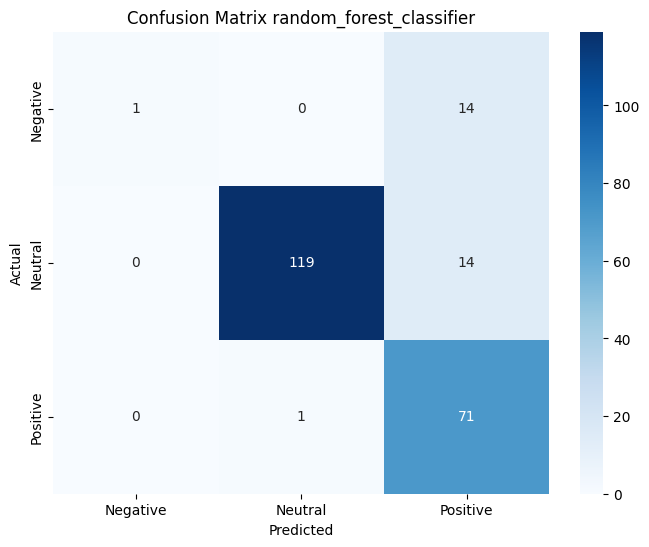

In [44]:
y_pred = random_forest_classifier.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix random_forest_classifier')
plt.show()